In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

sig_file = "1600sig.csv"
bkg_file = "BKG.csv"

In [103]:
variable = ["lepton_pt","pt_leading_jets","pt_second_jets","num_jet","Met1","Met0","MT","dR_lep_jet","eta_lepton","phi_lepton","eta_leading_jet","phi_leading_jet","eta_subleading_jet","phi_subleading_jet","phi_met"]


In [104]:
df_sig = pd.read_csv(sig_file,index_col=0)
df_bkg = pd.read_csv(bkg_file,index_col=0)

In [105]:
df_sig["signal"] = 1
df_sig

,lepton_pt,pt_leading_jets,pt_second_jets,num_jet,Met1,Met0,MT,dR_lep_jet,eta_lepton,phi_lepton,eta_leading_jet,phi_leading_jet,eta_subleading_jet,phi_subleading_jet,phi_met,signal
0,64705.550210,382259.062500,127415.750000,8,549117.389137,496683.757880,594056.253362,3.148623,-1.036673,-3.101424,-0.568492,0.012197,1.301820,-1.442274,2.630261,1
1,125557.376907,119087.726562,64744.445312,7,150939.100684,150168.474205,284409.336666,2.524642,-0.502598,0.707064,-0.589499,-1.816082,2.702051,0.632622,2.709820,1
2,111892.469916,221907.468750,80832.164062,5,219326.713121,166336.103338,356736.649199,2.382701,1.493777,1.646897,0.978084,-0.679328,-3.621850,-2.342271,2.354818,1
3,101472.638786,131958.578125,55168.855469,10,159517.211094,65890.168236,177171.974488,2.686505,0.696781,2.593600,2.460898,0.567470,-0.211930,-2.748173,-2.847105,1
4,105942.218939,100225.507812,74174.906250,4,91500.845470,88171.274598,194407.576743,3.405287,-0.110541,-3.131259,1.462843,0.131920,0.369535,1.320975,-1.358200,1
5,109370.523944,95443.648438,87515.164062,10,437016.834445,433541.833761,573601.628116,1.356689,0.826365,2.605569,-0.152145,-2.737870,0.858044,-1.917815,0.229706,1
6,21446.773073,308574.500000,230284.125000,7,164173.955104,186044.040357,208469.523968,2.484752,0.318039,-2.859020,-1.503704,1.734418,-0.491207,-2.053756,0.356301,1
7,227014.234285,193278.546875,155067.093750,6,175863.448942,103584.875487,334941.296027,2.414520,0.348792,-2.344600,-1.390214,-0.669559,-1.081422,2.433093,1.566758,1
8,32517.128964,101115.875000,86534.328125,5,173254.479893,180264.858835,214878.332024,1.479355,-0.388633,-0.570192,0.586580,-1.682600,-0.477461,-0.798599,1.808858,1
9,75065.528893,205785.531250,53039.082031,9,403821.473089,402653.549195,481590.425398,1.632828,0.348759,1.290846,-0.344177,2.769348,0.815038,2.871713,-0.936915,1


In [106]:
df_bkg["signal"]= 0
df_bkg


,lepton_pt,pt_leading_jets,pt_second_jets,num_jet,Met1,Met0,MT,dR_lep_jet,eta_lepton,phi_lepton,eta_leading_jet,phi_leading_jet,eta_subleading_jet,phi_subleading_jet,phi_met,signal
0,60432.759206,60601.593750,35012.183594,4,125903.457423,80650.155730,141414.125451,2.809222,0.138424,2.575995,0.809325,-0.979257,2.152482,-1.665547,1.606551,0
1,36174.190718,78055.875000,68556.820312,4,30351.888964,11138.107907,69061.524658,2.359713,2.099155,2.862712,1.674436,-1.099298,-0.169612,1.381267,0.840477,0
2,1639.017018,409132.375000,184498.703125,7,265786.036678,262507.486415,264648.712446,2.629901,0.764821,-2.402875,0.261729,0.178458,0.853000,3.106226,-2.808512,0
3,80571.552972,168935.281250,131370.796875,5,5918.115923,2736.829681,83778.214639,0.706218,-0.588149,2.201624,-0.402201,1.520327,0.393786,-1.805985,-0.820854,0
4,114977.920099,156084.062500,111515.210937,9,32721.686475,31730.719436,178217.368155,3.103014,-1.523502,-1.039730,-1.028119,2.023487,-0.810579,-1.243947,-0.569189,0
5,6726.094162,76264.484375,71742.820312,7,113542.927779,101448.067016,139907.724084,3.119226,2.599949,-0.910471,1.197561,1.875723,1.219648,-2.781755,-0.279342,0
6,74073.895915,69880.156250,61326.863281,5,65091.023357,24368.822529,99382.421393,2.481959,0.319539,-0.594181,2.800939,-0.646851,-0.323564,2.271464,-2.484182,0
7,46896.545221,84908.687500,58438.609375,5,88826.290506,72000.502309,125849.968635,2.532117,0.695786,1.133810,-0.223051,-1.225714,-0.742163,-2.755496,0.398404,0
8,50060.002820,63340.738281,46718.589844,8,16789.074588,15714.489978,69620.425532,2.683369,0.792675,2.920075,-1.225331,-1.594461,-2.352653,-0.972231,-0.298547,0
9,27264.855398,71384.203125,49560.046875,5,56828.723546,68268.045580,130817.520893,1.969819,1.812815,-1.664398,0.385511,-3.021967,3.001531,2.950523,0.529640,0


lepton_pt


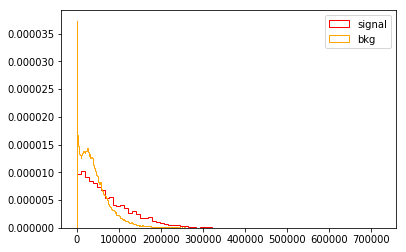

pt_leading_jets


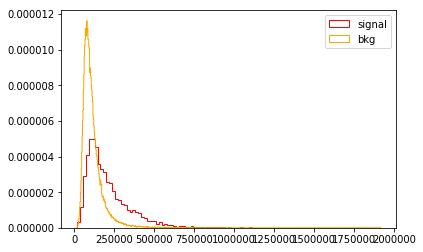

pt_second_jets


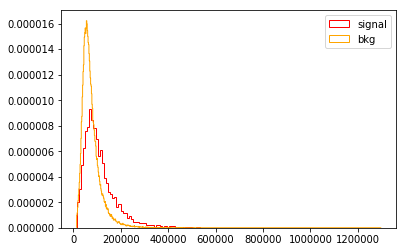

num_jet


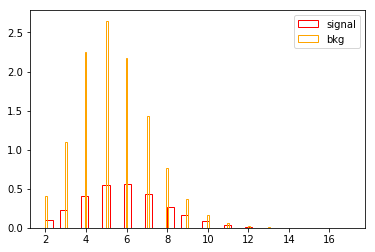

Met1


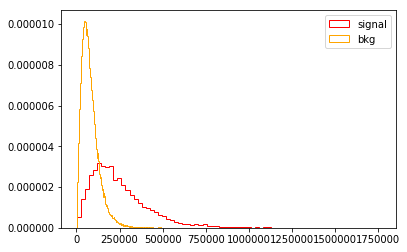

Met0


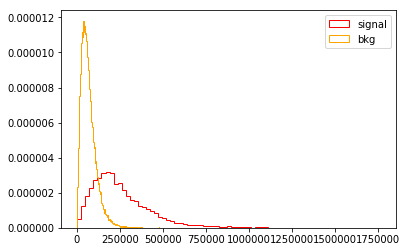

MT


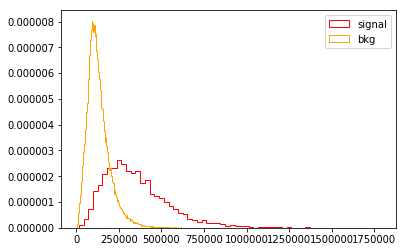

dR_lep_jet


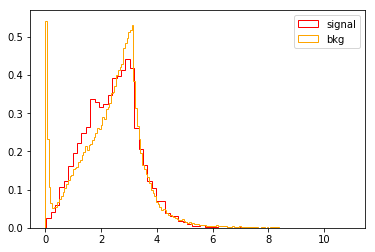

eta_lepton


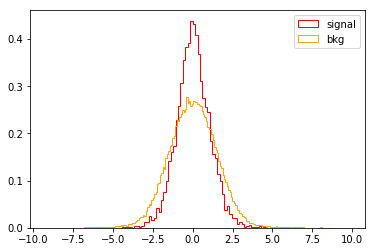

phi_lepton


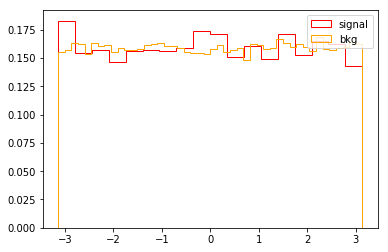

eta_leading_jet


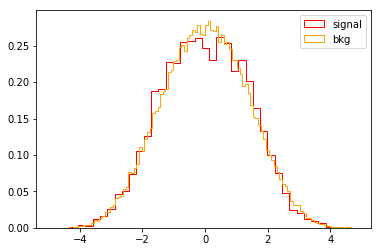

phi_leading_jet


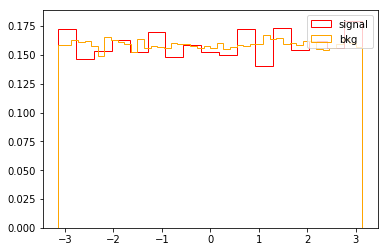

eta_subleading_jet


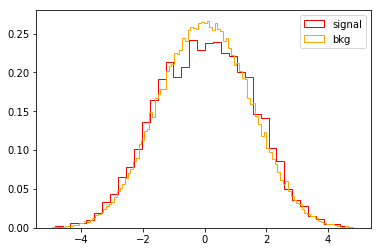

phi_subleading_jet


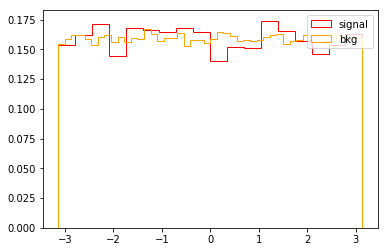

phi_met


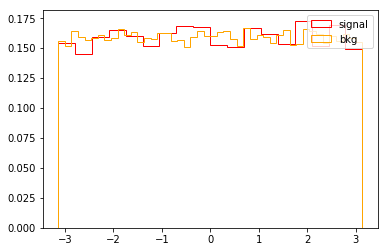

signal


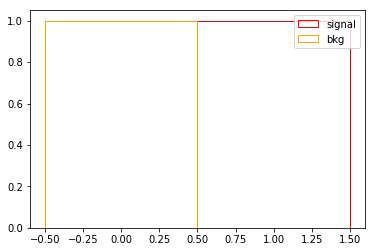

In [5]:
for var in df_sig.columns:
    print var
    plt.figure()
    plt.hist(df_sig[var],bins="auto",histtype="step", color="red",label="signal",normed=True,stacked=True)
    plt.hist(df_bkg[var],bins="auto",histtype="step", color="orange",label="bkg",normed=True,stacked=True)
    plt.legend(loc='upper right')
    plt.show()

In [68]:
n_bkg = 94679*90/100
n_sig = 4954*90/100

df_train = pd.concat([df_sig.iloc[:n_sig],df_bkg.iloc[:n_bkg]])
df_test =  pd.concat([df_sig.iloc[n_sig:],df_bkg.iloc[n_bkg:]])

df_train = sklearn.utils.shuffle(df_train)
df_test = sklearn.utils.shuffle(df_test)



x_train = df_train[variable].reset_index(drop=True)
y_train = df_train["signal"].reset_index(drop=True)


x_test = df_test[variable].reset_index(drop=True)
y_test = df_test["signal"].reset_index(drop=True)


In [69]:
u = np.reshape([y_train],(89669,1))
print np.shape(u)
u.sum()

(89669, 1)


4458

In [70]:
print np.shape(x_train)
print np.shape(y_test)

(89669, 15)
(9964,)


4458
496


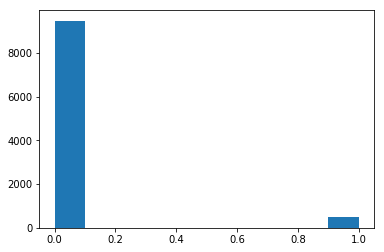

In [71]:
#this is the number of signal events in the training dataset
print y_train.sum()
print y_test.sum()

plt.figure()
plt.hist(y_test)
plt.show()

In [72]:
x_train.shape[1]

15

In [73]:
import os 
print "Using Queue:", os.environ["PBS_QUEUE"]
gpuid=int(os.environ["PBS_QUEUE"][3:4])
print "Using GPU:", gpuid
os.environ['THEANO_FLAGS'] = "device=cuda,floatX=float32,force_device=True" 



Using Queue: gpu7theco_ipynb
Using GPU: 7


In [74]:
import theano

In [80]:
from keras.models import Sequential
from keras.layers import Input, Dense, Activation, Dropout


model = Sequential()
model.add(Dense(15, input_dim=x_train.shape[1], kernel_initializer="random_uniform", activation='tanh'))
model.add(Dense(64, kernel_initializer="random_uniform", activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, kernel_initializer="random_uniform", activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, kernel_initializer="random_uniform", activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,kernel_initializer="random_uniform", activation='sigmoid'))

In [81]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 15)                240       
_________________________________________________________________
dense_18 (Dense)             (None, 64)                1024      
_________________________________________________________________
dropout_9 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_19 (Dense)             (None, 128)               8320      
_________________________________________________________________
dropout_10 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_11 (Dropout)         (None, 64)                0         
__________

In [82]:
history = model.fit(x_train.values,y_train.values,validation_data=(x_test.values,y_test.values), epochs=50, batch_size=32)

Train on 89669 samples, validate on 9964 samples
Epoch 1/50
89669/89669 [==============================] - 3s - loss: 0.2157 - acc: 0.9501 - val_loss: 0.1979 - val_acc: 0.9502
Epoch 2/50
89669/89669 [==============================] - 4s - loss: 0.2035 - acc: 0.9503 - val_loss: 0.1979 - val_acc: 0.9502
Epoch 3/50
89669/89669 [==============================] - 4s - loss: 0.2019 - acc: 0.9503 - val_loss: 0.1987 - val_acc: 0.9502
Epoch 4/50
89669/89669 [==============================] - 4s - loss: 0.2011 - acc: 0.9503 - val_loss: 0.1980 - val_acc: 0.9502
Epoch 5/50
89669/89669 [==============================] - 4s - loss: 0.2005 - acc: 0.9503 - val_loss: 0.1979 - val_acc: 0.9502
Epoch 6/50
89669/89669 [==============================] - 4s - loss: 0.1994 - acc: 0.9503 - val_loss: 0.1992 - val_acc: 0.9502
Epoch 7/50
89669/89669 [==============================] - 4s - loss: 0.1990 - acc: 0.9503 - val_loss: 0.1980 - val_acc: 0.9502
Epoch 8/50
89669/89669 [==============================] - 5s -

In [83]:
print history.history

{'acc': [0.9500719312136859, 0.9502838216105901, 0.9502838216112548, 0.9502838216105901, 0.9502838216105901, 0.9502838216105901, 0.9502838216105901, 0.9502838216112548, 0.9502838216112548, 0.9502838216105901, 0.9502838216105901, 0.9502838216105901, 0.9502838216105901, 0.9502838216105901, 0.9502838216105901, 0.9502838216112548, 0.9502838216105901, 0.9502838216105901, 0.9502838216105901, 0.9502838216105901, 0.9502838216112548, 0.9502838216112548, 0.9502838216105901, 0.9502838216105901, 0.9502838216105901, 0.9502838216105901, 0.9502838216105901, 0.9502838216112548, 0.9502838216112548, 0.9502838216105901, 0.9502838216112548, 0.9502838216112548, 0.9502838216105901, 0.9502838216105901, 0.9502838216112548, 0.9502838216105901, 0.9502838216105901, 0.9502838216105901, 0.9502838216105901, 0.9502838216105901, 0.9502838216105901, 0.9502838216105901, 0.9502838216112548, 0.9502838216105901, 0.9502838216119195, 0.9502838216105901, 0.9502838216105901, 0.9502838216112548, 0.9502838216105901, 0.950283821

In [84]:
model.evaluate(x_test.values,y_test.values,batch_size=32)

8096/9964 [=======================>......] - ETA: 0s

[0.19788184459162303, 0.9502207948615013]

In [85]:
model.metrics_names

['loss', 'acc']

In [86]:
y_predit = model.predict(x_test.values, batch_size=32)

[[0.04851279]
 [0.04851279]
 [0.04851279]
 ...
 [0.04851279]
 [0.04851279]
 [0.04851279]]


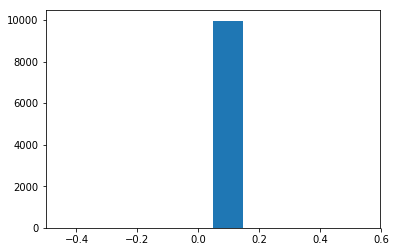

In [87]:
print y_predit


plt.figure()
plt.hist(y_predit)
plt.show()

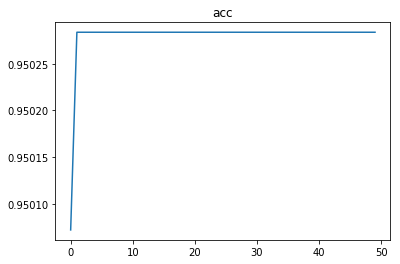

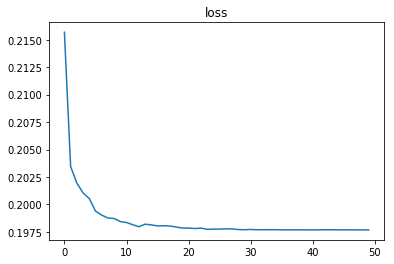

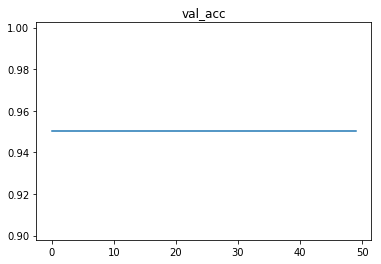

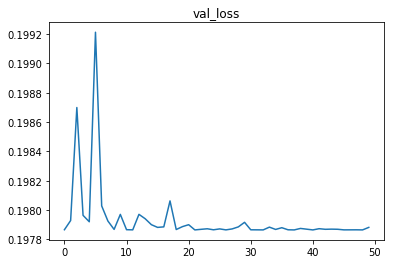

In [102]:
for u in history.history:
    plt.figure()
    plt.plot(history.history[u])
    plt.title(u)